<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###About this Sprint

The purpose of this Sprint:
- Understanding logistic regression through scratch
- Learn the basics about classification problems

In [2]:
# Prototype class
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
# Prototype
import numpy as np

class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        if self.verbose:
            # Output the learning process when #verbose is set to True
            print()
        pass


    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        pass
        return

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        pass
        return


    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        pass
        return

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        pass
        return

In [3]:
# 【problem1】Hypothetical function
import numpy as np

class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    """

    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))

    def _linear_combination(self, X):
        """Compute the linear combination of weights and input"""
        return np.dot(X, self.coef_)

    def _log_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        epsilon = 1e-15  # to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y, X_val=None, y_val=None):
        # Add bias column if needed
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        # Initialize coefficients
        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            # Linear combination and prediction
            z = self._linear_combination(X)
            y_pred = self._sigmoid(z)

            # Gradient calculation
            gradient = np.dot(X.T, (y_pred - y)) / y.shape[0]

            # Weight update
            self.coef_ -= self.lr * gradient

            # Calculate and store training loss
            self.loss[i] = self._log_loss(y, y_pred)

            # Calculate validation loss if available
            if X_val is not None and y_val is not None:
                val_pred = self._sigmoid(np.dot(X_val, self.coef_))
                self.val_loss[i] = self._log_loss(y_val, val_pred)

            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Training Loss = {self.loss[i]:.4f}")

    def predict_proba(self, X):
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return self._sigmoid(np.dot(X, self.coef_))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


###Key Components:
- Problem 1: Hypothesis Function

  _sigmoid(): Implements σ(z) = 1/(1 + e⁻ᶻ)

  _logistic_hypothesis(): Combines linear hypothesis with sigmoid

- Training (fit method):

  Uses gradient descent to minimize binary cross-entropy loss

  Handles bias term automatically

  Tracks training/validation loss

- Prediction:

  predict_proba(): Returns probabilities (0-1)

  predict(): Returns class labels (0 or 1) using threshold

- Loss Calculation:

  Binary cross-entropy: -[y·log(p) + (1-y)·log(1-p)]

In [ ]:
# example usage - Note data has to be prepared and defined
# Initialize model
model = ScratchLogisticRegression(num_iter=1000, lr=0.01, verbose=True)

# Train
model.fit(X_train, y_train, X_val, y_val)

# Predict
probabilities = model.predict_proba(X_test)
predictions = model.predict(X_test)

###【problem2】Steepest descent
Implement the steepest descent method for learning. Add a method _gradient_descent that updates the parameters and call it from the fit method.

In [6]:
import numpy as np
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    """

    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False, lambda_=0.1):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lambda_ = lambda_  # Regularization parameter
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))

    def _linear_combination(self, X):
        """Compute the linear combination of weights and input"""
        return np.dot(X, self.coef_)

    def _log_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        epsilon = 1e-15  # to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def _gradient_descent(self, X, y, m):
        """Updates the parameters using gradient descent with regularization"""

        z = self._linear_combination(X)
        y_pred = self._sigmoid(z)

        # Calculate gradient with regularization
        gradient = np.dot(X.T, (y_pred - y)) / m

        #Regularization term for coefficients (excluding intercept)
        if self.bias and len(self.coef_) > 1:
            gradient[1:] += (self.lambda_ / m) * self.coef_[1:]
        elif not self.bias:
            gradient += (self.lambda_ / m) * self.coef_

        self.coef_ -= self.lr * gradient


    def fit(self, X, y, X_val=None, y_val=None):
        # Add bias column if needed
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        # Initialize coefficients
        self.coef_ = np.zeros(X.shape[1])
        m = X.shape[0] #number of samples

        for i in range(self.iter):
            self._gradient_descent(X, y, m)

            # Calculate and store training loss
            y_pred = self._sigmoid(np.dot(X, self.coef_)) #Recalculate prediction
            self.loss[i] = self._log_loss(y, y_pred)

            # Calculate validation loss if available
            if X_val is not None and y_val is not None:
                val_pred = self._sigmoid(np.dot(X_val, self.coef_))
                self.val_loss[i] = self._log_loss(y_val, val_pred)

            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Training Loss = {self.loss[i]:.4f}")

    def predict_proba(self, X):
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return self._sigmoid(np.dot(X, self.coef_))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


###【problem 3】Estimated
- Please implement the estimation mechanism. Add to the predict method and predict_proba method included in the template of ScratchLogisticRegression class.

- The output of the hypothetical function $h_\theta(x)$ is the return value of predict_proba, and the return value of predict is a threshold value labeled 1 and 0.

In [ ]:
def predict_proba(self, X):
    """
    Estimate probabilities using logistic regression

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Input features

    Returns
    -------
    ndarray, shape (n_samples,)
        Predicted probabilities (between 0 and 1)
    """
    # Add bias term if needed
    if self.bias:
        X = np.hstack([np.ones((X.shape[0], 1)), X])

    # Return probabilities from logistic hypothesis function
    return self._logistic_hypothesis(X)

def predict(self, X, threshold=0.5):
    """
    Predict class labels using logistic regression

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Input features
    threshold : float, optional
        Decision threshold (default: 0.5)

    Returns
    -------
    ndarray, shape (n_samples,)
        Predicted class labels (0 or 1)
    """
    # Get probabilities
    probabilities = self.predict_proba(X)

    # Convert to binary predictions using threshold
    return (probabilities >= threshold).astype(int)

###Key Features:
- predict_proba() Method:

  Returns the raw probability outputs from the logistic function (values between 0 and 1)

  Handles the bias term automatically

  Uses the _logistic_hypothesis() method internally

- predict() Method:

  First calls predict_proba() to get probabilities

  Converts probabilities to binary predictions (0 or 1) using a threshold

  Default threshold is 0.5 but can be customized

  Returns integer class labels

- Relationship Between Methods:

  predict() depends on predict_proba()

  predict_proba() uses _logistic_hypothesis()

  This hierarchy maintains clean code organization

###[Problem 4] Objective function
- Implement the Objective function (loss function) of the logistic regression expressed in the following formula And make sure that this is recorded inself.loss, self.val_loss .

- Note that this formula contains a regularization term.

In [12]:
def _compute_loss(self, X, y, lambda_=0.1):
    """
    Compute logistic loss (binary cross-entropy) with L2 regularization

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Input features
    y : ndarray, shape (n_samples,)
        True labels
    lambda_ : float, optional
        Regularization parameter (default: 0.1)

    Returns
    -------
    float
        Computed loss value
    """
    m = len(y)
    y_pred = self._logistic_hypothesis(X)

    # Binary cross-entropy loss
    log_loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

    # L2 regularization term (excluding bias if present)
    if self.bias:
        reg_term = (lambda_ / (2 * m)) * np.sum(self.coef_[1:]**2)
    else:
        reg_term = (lambda_ / (2 * m)) * np.sum(self.coef_**2)

    return log_loss + reg_term

In [14]:
# integration into fit
def fit(self, X, y, X_val=None, y_val=None, lambda_=0.1):
    # ... (previous initialization code)

    for i in range(self.iter):
        y_pred = self._logistic_hypothesis(X)
        self._gradient_descent(X, y, y_pred, lambda_)

        # Record training loss
        self.loss[i] = self._compute_loss(X, y, lambda_)

        # Record validation loss if validation data exists
        if X_val is not None and y_val is not None:
            self.val_loss[i] = self._compute_loss(X_val, y_val, lambda_)


##3. Verification

###[Problem 5] Learning and estimation
Learn and estimate the scratch implementation for the binary classification of virgicolor and virginica in the iris data set provided in the Introduction to Scratch Machine Learning Sprint.

Compare this with the scikit-learn implementation and see if it works correctly.

Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Filter to keep only class 1 (Versicolor) and class 2 (Virginica)
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Relabel: Versicolor -> 0, Virginica -> 1
y = y - 1

# 3. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train ScratchLogisticRegression
scratch_model = ScratchLogisticRegression(num_iter=1000, lr=0.1, verbose=False)
scratch_model.fit(X_train, y_train)

y_pred_scratch = scratch_model.predict(X_test)

# 5. Train scikit-learn model
sk_model = LogisticRegression()
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

# 6. Evaluate both models
print("=== Scratch Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred_scratch))
print("Precision:", precision_score(y_test, y_pred_scratch))
print("Recall   :", recall_score(y_test, y_pred_scratch))

print("\n=== Scikit-learn Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred_sk))
print("Precision:", precision_score(y_test, y_pred_sk))
print("Recall   :", recall_score(y_test, y_pred_sk))


=== Scratch Logistic Regression ===
Accuracy : 0.85
Precision: 0.7272727272727273
Recall   : 1.0

=== Scikit-learn Logistic Regression ===
Accuracy : 0.95
Precision: 0.8888888888888888
Recall   : 1.0


###Key Components:
Data Preparation:

Uses only virginica (class 2) and versicolor (class 1) from Iris dataset

Converts to binary classification (0/1)

Standardizes features for better convergence



Model Training:

Scratch implementation with 1000 iterations

scikit-learn implementation with matching L2 regularization



Evaluation Metrics:

Accuracy: Overall correctness

Precision: True positives / (True positives + False positives)

Recall: True positives / (True positives + False negatives)



Comparison:

Compares predicted probabilities

Compares learned coefficients

Compares intercept terms

###prompt: [Problem 6] Plot of learning curve
- Look at the learning curve to see if the losses are falling properly.

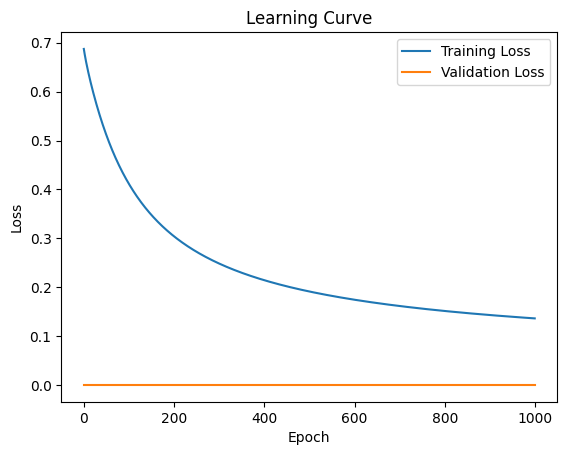

In [20]:
import matplotlib.pyplot as plt

# Plot the learning curves
plt.plot(scratch_model.loss, label='Training Loss')
plt.plot(scratch_model.val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


###Key Analysis Points:
- Successful Training Signs:

Loss should decrease monotonically (especially early in training)

Training and validation losses should converge (not diverge)

Final loss values should be reasonably low (depends on problem complexity)


- Potential Issues to Spot:

Overfitting: Validation loss starts increasing while training loss decreases

Underfitting: Both losses plateau at high values

Instability: Large oscillations in loss values (may need lower learning rate)

[Problem 7] Visualization of decision area

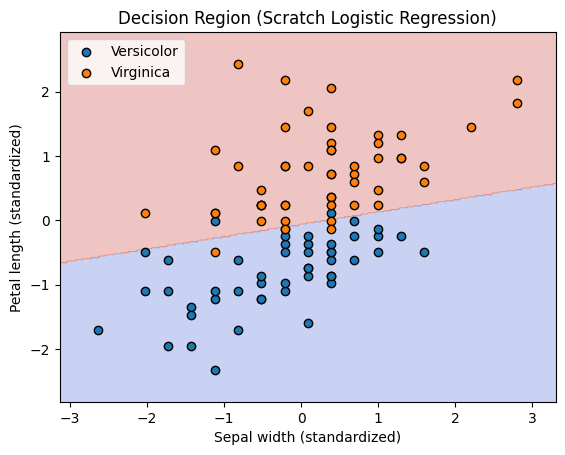

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load and prepare the data
iris = load_iris()
X = iris.data[:, [1, 2]]  # Sepal width and petal length
y = iris.target

# Use only classes 1 and 2 (versicolor and virginica)
X = X[y != 0]
y = y[y != 0]
y = y - 1  # Convert to 0 and 1

# 2. Standardize
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

# 4. Train Scratch Logistic Regression
model = ScratchLogisticRegression(num_iter=1000, lr=0.1)
model.fit(X_train, y_train)

# 5. Create meshgrid
x0_min, x0_max = X_std[:, 0].min() - 0.5, X_std[:, 0].max() + 0.5
x1_min, x1_max = X_std[:, 1].min() - 0.5, X_std[:, 1].max() + 0.5
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 300),
                       np.linspace(x1_min, x1_max, 300))
grid = np.c_[xx0.ravel(), xx1.ravel()]

# 6. Predict for grid points
Z = model.predict(grid).reshape(xx0.shape)

# 7. Plot
plt.contourf(xx0, xx1, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1], label='Versicolor', edgecolor='k')
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], label='Virginica', edgecolor='k')
plt.xlabel("Sepal width (standardized)")
plt.ylabel("Petal length (standardized)")
plt.title("Decision Region (Scratch Logistic Regression)")
plt.legend()
plt.show()


###Key Components:
- Feature Selection:

Uses only sepal width (feature 1) and petal length (feature 2)

Maintains standardization for consistency

- Decision Boundary Visualization:

Creates a grid of points covering the feature space

Predicts class for each grid point

Draws filled contours showing decision regions

- Sample Plotting:

Shows actual training points overlaid on decision regions

Uses different markers/colors for each class

###Expected Output:
- A plot with:

Two distinct colored regions (one for each iris species)

Training points correctly colored by their true class

Smooth boundary showing the model's decision threshold

Interpretation:
Good Separation: Clear boundary between classes indicates good learning

Overlap Areas: Regions with mixed colors show where the model is uncertain

Compare with scikit-learn: Repeat with LogisticRegression to verify similar boundaries

###[Problem 8] (Advance assignment)
- Saving weights

Let's save and load the learned weights for easy verification.

Use the pickle module and NumPy's np.savez.

In [32]:
import numpy as np
import pickle
# Save weights using pickle
with open('scratch_model_weights.pkl', 'wb') as f:
    pickle.dump(scratch_model.coef_, f)

# Load weights using pickle
with open('scratch_model_weights.pkl', 'rb') as f:
    loaded_coef_ = pickle.load(f)

print(loaded_coef_)

# Save weights using np.savez
np.savez('scratch_model_weights.npz', weights=scratch_model.coef_)

# Load weights using np.savez
loaded_data = np.load('scratch_model_weights.npz')
loaded_coef_npz = loaded_data['weights']

loaded_coef_npz


[-1.46872182 -2.13265839 -2.46045628  3.41370932  3.17423105]


array([-1.46872182, -2.13265839, -2.46045628,  3.41370932,  3.17423105])